In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, datetime, statsmodels.formula.api as smf, matplotlib.dates as mdates
%matplotlib inline
plt.style.use('ggplot')

In [2]:
def convertDate(d):
    dt = datetime.datetime.strptime(d, '%m/%d/%Y')
    dt = dt.replace(day=1)
    return dt

df = pd.read_csv('data/NYPD_Motor_Vehicle_Collisions.csv', converters={'DATE': convertDate})

In [3]:
c_inj_agg = df.groupby('DATE').sum()['NUMBER OF CYCLIST INJURED']
c_k_agg = df.groupby('DATE').sum()['NUMBER OF CYCLIST KILLED']

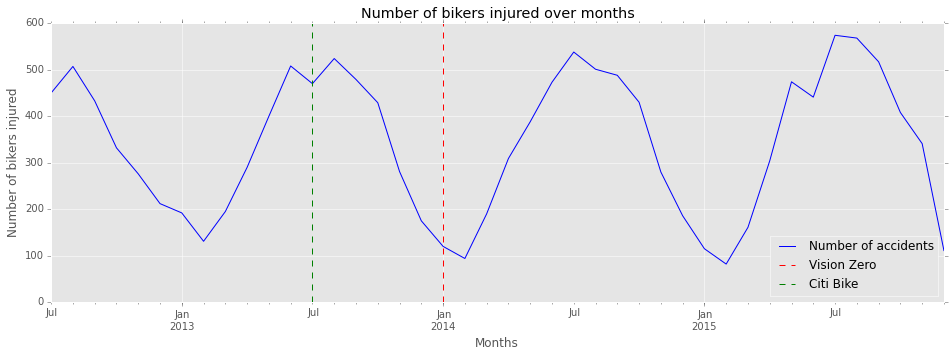

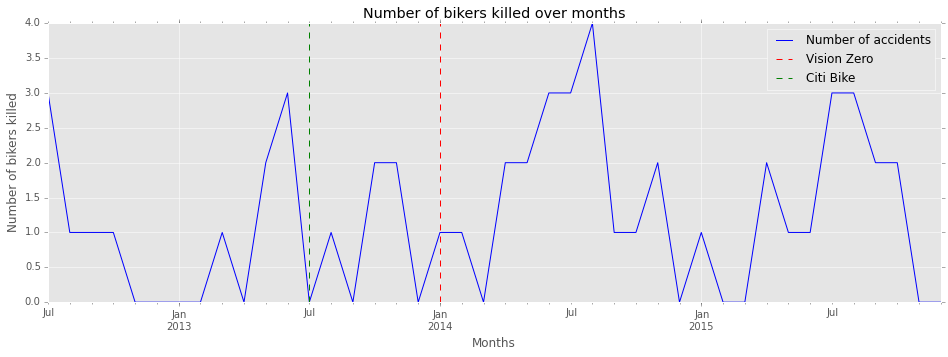

In [4]:
plt.figure(figsize=(16,5))
c_inj_agg.plot(color='b', label='Number of accidents')
plt.axvline(c_inj_agg.index[18], linestyle='--', color='r', label='Vision Zero')
plt.axvline(c_inj_agg.index[12], linestyle='--', color='g', label='Citi Bike')
plt.ylabel('Number of bikers injured')
plt.xlabel('Months')
plt.title('Number of bikers injured over months')
plt.legend(loc=0)
plt.figure(figsize=(16,5))
c_k_agg.plot(color='b', label='Number of accidents')
plt.axvline(c_k_agg.index[18], linestyle='--', color='r', label='Vision Zero')
plt.axvline(c_k_agg.index[12], linestyle='--', color='g', label='Citi Bike')
plt.ylabel('Number of bikers killed')
plt.xlabel('Months')
plt.title('Number of bikers killed over months')
plt.legend(loc=0)

In [5]:
df['MONTH'] = df.apply(lambda x: x['DATE'].month, axis=1)
months = df.groupby('DATE').mean()['MONTH']

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     53.61
Date:                Fri, 18 Dec 2015   Prob (F-statistic):           1.76e-16
Time:                        05:52:43   Log-Likelihood:                -206.02
No. Observations:                  42   AIC:                             438.0
Df Residuals:                      29   BIC:                             460.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      133.3929     24.453      5.455   

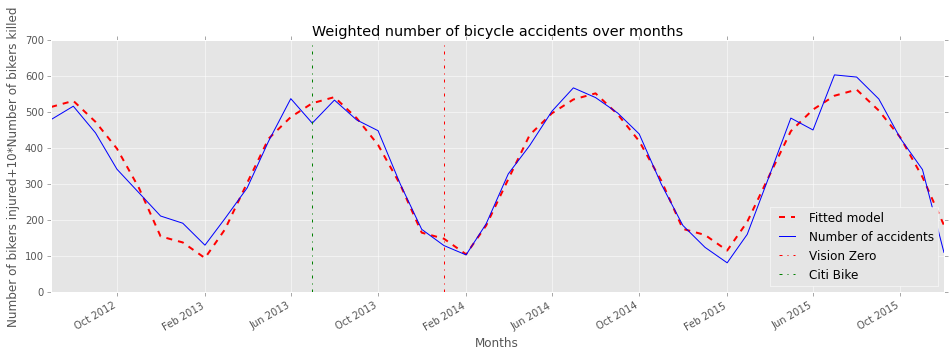

In [6]:
c_sev = c_inj_agg + 10*c_k_agg
plt.figure(figsize=(16,5))
data = {'y': c_sev, 'x': range(len(c_sev)), 'm': months}
model = smf.ols(formula='y ~ x + C(m)', data = data).fit()
print model.summary()
fit = model.predict(data)
plt.plot_date(c_sev.index, fit, 'r', linestyle='--', lw=2, label='Fitted model')
c_sev.plot(color='b', label='Number of accidents')
plt.axvline(c_sev.index[18], linestyle='-.', color='r', label='Vision Zero')
plt.axvline(c_sev.index[12], linestyle='-.', color='g', label='Citi Bike')
plt.ylabel('Number of bikers injured+10*Number of bikers killed')
plt.xlabel('Months')
plt.title('Weighted number of bicycle accidents over months')
plt.legend(loc=0)

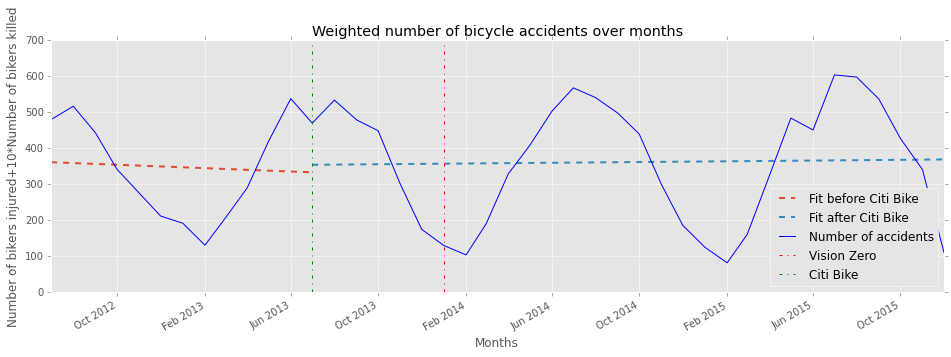

In [7]:
plt.figure(figsize=(16,5))
idx = [c_sev.index[i] for i in range(13)]
y = [c_sev[i] for i in range(13)]
x = np.arange(len(y))
model = smf.ols(formula='y ~ x', data = {'x': x, 'y': y}).fit()
fit = model.params[0] + x*model.params[1]
plt.plot(idx, fit, linestyle='--', lw=2, label='Fit before Citi Bike')
idx1 = [c_sev.index[i] for i in range(12,len(c_sev))]
y1 = [c_sev[i] for i in range(12,len(c_sev))]
x1 = np.arange(len(y1))
model1 = smf.ols(formula='y ~ x', data = {'x': x1, 'y': y1}).fit()
fit1 = model1.params[0] + x1*model1.params[1]
plt.plot(idx1, fit1, linestyle='--', lw=2, label='Fit after Citi Bike')
#idx2 = [c_sev.index[i] for i in range(18,len(c_sev))]
#y2 = [c_sev[i] for i in range(18,len(c_sev))]
#x2 = np.arange(len(y2))
#model2 = smf.ols(formula='y ~ x', data = {'x': x2, 'y': y2}).fit()
#fit2 = model2.params[0] + x2*model2.params[1]
#plt.plot(idx2, fit2, linestyle='--', lw=2, label='Fit after Vision Zero')
c_sev.plot(color='b', label='Number of accidents')
plt.axvline(c_sev.index[18], linestyle='-.', color='r', label='Vision Zero')
plt.axvline(c_sev.index[12], linestyle='-.', color='g', label='Citi Bike')
plt.ylabel('Number of bikers injured+10*Number of bikers killed')
plt.xlabel('Months')
plt.title('Weighted number of bicycle accidents over months')
plt.legend(loc=0)